# **mounting google drive and converting excel file into dataframe**

In [174]:
#neccesary library modules
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize



In [175]:
#mounting the drive and defining the dataset(Global-Superstore.xlsx)path
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Napqueen_assignmentround_Harishkumar-20MID0155/Global-Superstore.xlsx'
#converting into dataframe
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Understanding the dataset structure**

In [176]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [177]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,S‹o Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [178]:
df.shape

(51290, 24)

# **Assess datatypes and fix if needed**


1.   convert the categorical columns to 'category' which saves memory and speedup processing
2. since date and time are important in interactive visualization dashboard,ensure datetime columns are properly parsed



In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [181]:
#df['Postal Code'] = df['Postal Code'].fillna(0).astype('int64')  # Using 0 or another appropriate value for missing postal codes
df = df.drop(columns=['Postal Code'])

In [182]:
categorical_columns = ['Ship Mode', 'Customer ID', 'Segment', 'City', 'State', 'Country',
                       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
                       'Product Name']
df[categorical_columns] = df[categorical_columns].astype('category')

In [183]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [184]:
df.info() #after assessing the  datatypes and fixing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  category      
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  category      
 9   State           51290 non-null  category      
 10  Country         51290 non-null  category      
 11  Market          51290 non-null  category      
 12  Region          51290 non-null  category      
 13  Product ID      51290 non-null  category      
 14  Category        51290 non-null  category      
 15  Su

# **summary statistics:**

1.   getting summary for numerical columns
2.   by using value_counts, i get distribution of categorical variables



# **FROM THE NUMERICAL SUMMARY **

1.   **Row ID:**
  
Range: 1 to 51,290

Interpretation: Since Row ID is used for indexing or unique identification, the range being sequential or unique suggests that it serves its intended purpose. No specific analysis needed here.

2.   **Postal Code:**

Range and Mean/Std Dev: Postal codes should be categorical and not typically analyzed using mean or standard deviation. The presence of 0 and a wide range might indicate missing or incorrect data.

Action: Check for invalid or missing postal codes. This column may need to be cleaned or converted to a categorical variable if it is used for geographical analysis.

3.   **Sales:**

Range: 0.44 to 22,638.48
Interpretation: A large difference between the mean (246.49) and maximum value (22,638.48) suggests the presence of significant outliers.

Action: Investigate extreme values to determine if they are errors or genuine high-value transactions. Consider applying outlier detection methods or data transformation (e.g., logarithmic scaling) to manage these outliers.
4.  **Quantity:**
    looks fine and consistent.
5.  **Discount:**
    The range of discounts appears reasonable.
6.  **Profit:**

Range: -6,599.98 to 8,399.98

Interpretation: The presence of negative profits indicates losses, and the large range suggests high variability in profitability.

Action: Investigate the causes of negative profits and extreme high profits. Assess if these values are errors, or if they reflect real business scenarios. This analysis can inform pricing or cost strategies.
7.  **shipping cost:**

Range: 0.00 to 933.57

Interpretation: High maximum value and standard deviation suggest that some shipping costs are significantly higher than average.

Action: Analyze shipping cost data for potential errors or outliers. Review shipping policies or cost structures to understand why there are such high values and whether they are justifiable.

In [185]:
# Summary statistics for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date         Sales      Quantity  \
count                          51290  51290.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528    246.490581      3.476545   
min              2011-01-03 00:00:00      0.444000      1.000000   
25%              2012-06-23 00:00:00     30.758625      2.000000   
50%              2013-07-12 00:00:00     85.053000      3.000000   
75%              2014-05-26 00:00:00    251.053200      5.000000   
max              2015-01-07 00:00:00  22638.48

# **From the Value count**
#This helps in finding relations.
1.   **ship mode:**

Distribution: Standard Class is the most common, followed by Second Class, First Class, and Same Day.

Action: Analyze the impact of shipping modes on metrics like sales and profit to understand their effects on overall performance.
2.   **customer id:**

Distribution: Many IDs appear only once, while a few are more frequent.

Action: Ensure there is no duplication of data and consider analyzing customer behavior to identify patterns

3. **segment:**

Distribution: Consumer is the largest segment, followed by Corporate and Home Office.

Action: Segment analysis by customer type can provide insights into different customer behaviors and preferences.
4. **city:**

Distribution: A few cities have many records, while many cities have only one.

Action: Focus on top cities for detailed analysis or aggregate cities into broader regions for more meaningful insights.
5. **state:**

Distribution: Some states have many records, while many have only a few.

Action: Consider aggregating states into broader regions for more comprehensive analysis in the dashboard.

6. **country:**

Distribution: The majority of records are from the United States, with other countries having fewer records.

Action: Ensure representation of countries with fewer records in global analysis to avoid skewed insights.

7. **Market:**

Distribution: APAC and LATAM have the highest counts, followed by EU and US.

Action: Use this distribution for regional market analysis and understand market trends across different regions.

8.  **Region:**

Distribution: Central is the most common region, with other regions also represented.

Action: Ensure regions with fewer records do not disproportionately affect the analysis. Consider balancing regional data for accurate insights.

9. **Product ID:**

Distribution: Many product IDs appear only once, with a few having multiple occurrences.

Action: Focus on high-frequency products or aggregate similar products for a clearer analysis of product performance.

10. **Category:**

Distribution: Office Supplies is the largest category, followed by Technology and Furniture.

Action: Analyze the performance and contributions of each category separately to understand their impact.

11. **Sub-Category:**

Distribution: Various sub-categories with some having more records than others.

Action: Focus on high-volume sub-categories for detailed analysis within each category.

12. **Product Name:**

Distribution: Many product names appear only once, with a few being more common.

Action: For detailed product analysis, focus on high-frequency products or aggregate product names into broader categories for a more manageable analysis.

In [186]:
# Get value counts for categorical columns
categorical_summary = {}
for col in categorical_columns:
    categorical_summary[col] = df[col].value_counts()

# Print value counts for each categorical column
for col, counts in categorical_summary.items():
    print(f"Value counts for {col}:\n{counts}\n")

Value counts for Ship Mode:
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Value counts for Customer ID:
Customer ID
PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
EM-13960    85
            ..
ME-8010      1
MG-7890      1
ZC-11910     1
MG-7650      1
DK-2985      1
Name: count, Length: 1590, dtype: int64

Value counts for Segment:
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Value counts for City:
City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Santo Domingo      443
                  ... 
Chapel Allerton      1
Changzhi             1
Changde              1
Champaign            1
Moulins              1
Name: count, Length: 3636, dtype: int64

Value counts for State:
State
California          2001
England             1499
New York            1128
Texas                985
Ile-de-France  

# **missing values **

1.   first i am going to identifying the missing values
2.   handling the missing values



In [187]:
# Fill missing values in numerical columns with the median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

In [188]:
# Fill missing values in categorical columns with the mode
categorical_columns = df.select_dtypes(include=['category']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [189]:
# we can also drop the records(rows with missing values )this is suggested only if the datset is very big and dropping rows wont affect our model
# Drop rows with any missing values
#df_cleaned = df.dropna()
## Verify there are no missing values remaining
#missing_values_after = df.isnull().sum()
#print(missing_values_after)


# **Outliers and Anomalies:**

1.   detecting the outliers
2.   using statistical method like interquartile range(q1-1.5*IQR or above q3+1.5*IQR)
3. Adressing the Outliers: In this we remove outlier,transform data(transformations like logarithmic scaling to reduce impact of outliers) and keep outlier if they are valid and meaningful(we have to make sure the impact if we keep them)




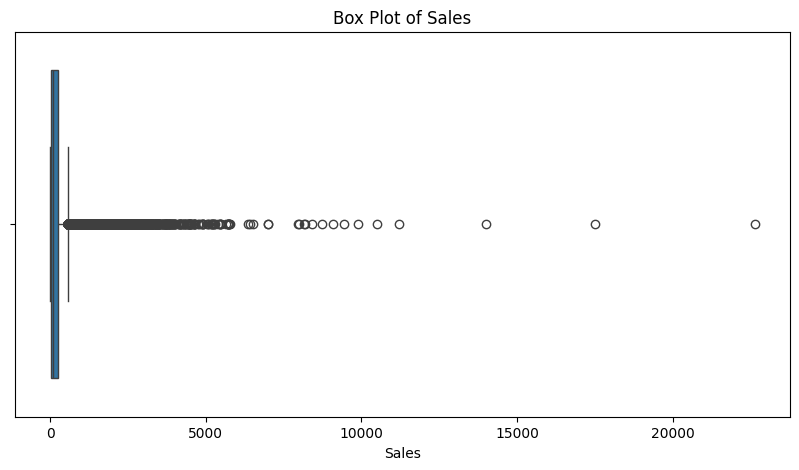

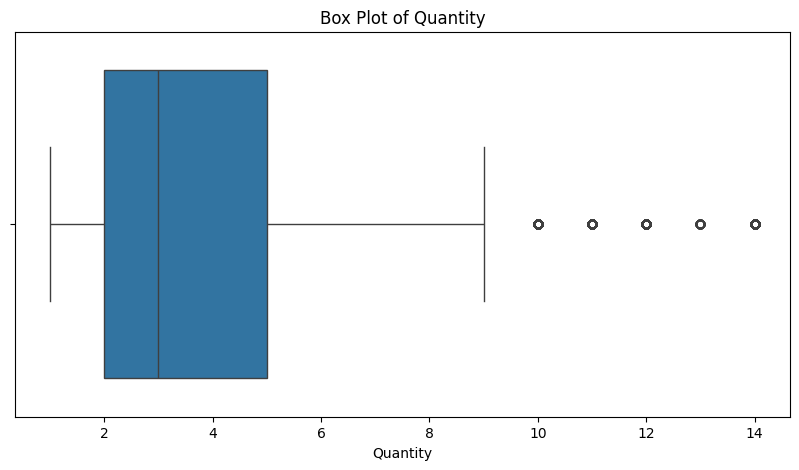

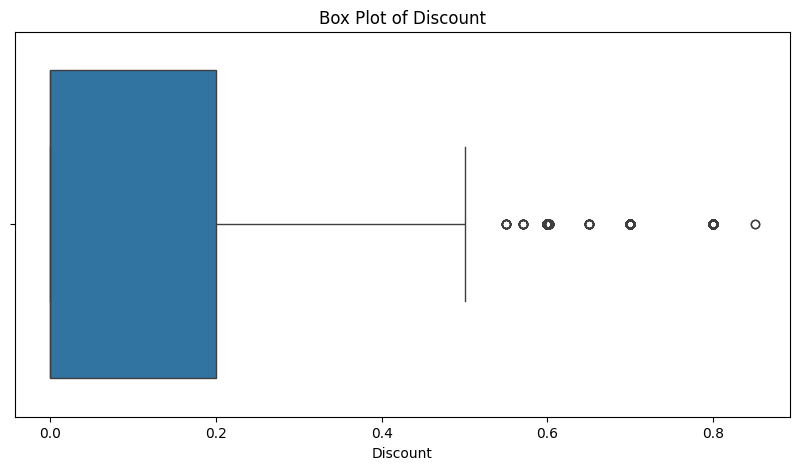

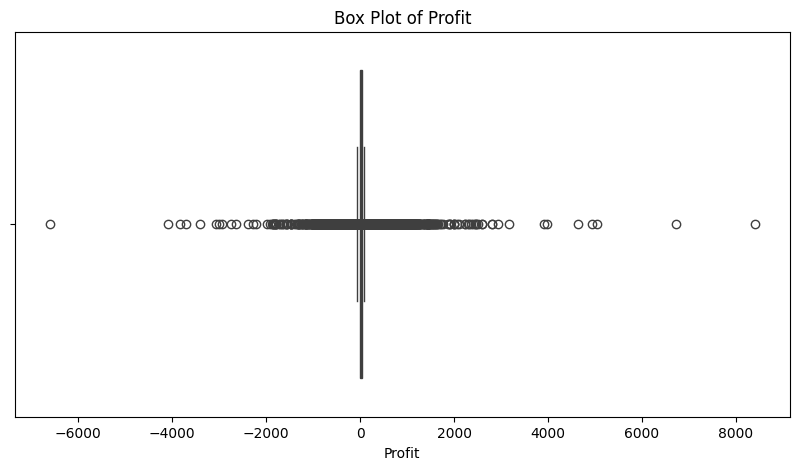

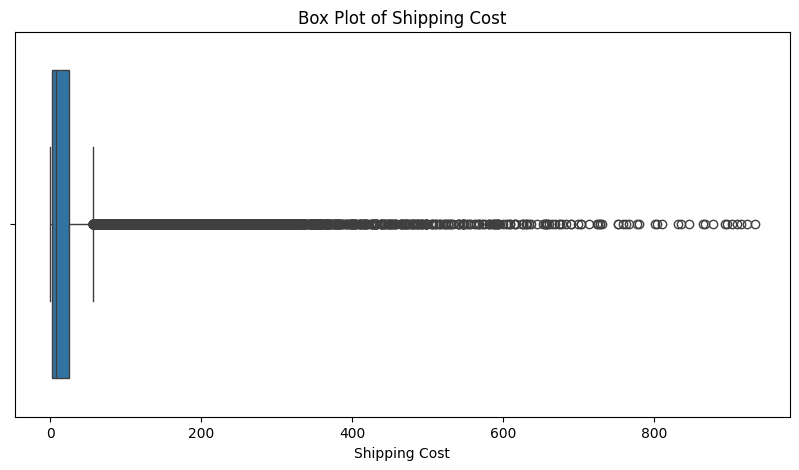

In [190]:

# List of numerical columns to check for outliers
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [191]:
#1.for detecting outlier with iqr
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#2.calling function for each column
# List to store outliers for each column
outliers_list = []

# Detect outliers for each numerical column
for col in numerical_columns:
    col_outliers = detect_outliers_iqr(df, col)
    col_outliers['Column'] = col  # Add column name for identification
    outliers_list.append(col_outliers)

# Combine all outliers into a single DataFrame
df_outliers = pd.concat(outliers_list).drop_duplicates()

# Verify the result
print(f"Total number of outliers: {len(df_outliers)}")
df_outliers.head()


Total number of outliers: 26368


<ipython-input-191-af42681572f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_outliers['Column'] = col  # Add column name for identification
<ipython-input-191-af42681572f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_outliers['Column'] = col  # Add column name for identification
<ipython-input-191-af42681572f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Column
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,Sales
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Sales
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,Sales
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,Sales
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,Sales


In [192]:
# Analyze outliers
df_outliers.describe()  # Get summary statistics for outliers


,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,26368.000000,26368,26368,26368.000000,26368.000000,26368.000000,26368.000000,26368.000000
mean,26633.214844,2013-05-04 17:27:43.470873856,2013-05-08 13:13:56.650485504,838.055006,4.785611,0.227493,94.371364,94.182315
min,8.000000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,14439.000000,2012-06-08 00:00:00,2012-06-12 00:00:00,260.520000,3.000000,0.000000,-57.195000,21.402500
50%,26192.000000,2013-06-25 00:00:00,2013-06-29 00:00:00,644.256000,4.000000,0.100000,95.040000,64.935000
75%,39709.000000,2014-05-20 00:00:00,2014-05-23 00:00:00,1091.295450,6.000000,0.500000,224.532000,120.872500
max,51284.000000,2014-12-31 00:00:00,2015-01-05 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14600.613491,NaN,NaN,909.955446,2.921749,0.267278,412.073184,110.789207


# **HANDLING OUTLIERS:**

SINCE ALL FEATURES ARE IMPORTANT;
1.   **Transformation:**
    we use (Log Transformation which is useful for skewed data)(Square Root Transformation which can help with count data)
    (Box-Cox Transformation which is useful for stabilizing variance and normalizing data).
2.   if transformation not sufficient we can do:
    **winsorization:**
    it involves capping extreme values to reduce their impact
3. After that we do seprate analysis to check impact since incase we consider some outliers which are important.we can do (**Segment Analysis:** Analyze outliers as a separate segment to see how they affect overall trends)
(**Impact Assessment:** Compare results with and without outliers).




In [193]:

# Apply transformations
df_transformed = df.copy()

# Log transformation for Sales, Profit, and Shipping Cost
for col in ['Sales', 'Profit', 'Shipping Cost']:
    df_transformed[col] = np.log1p(df[col])

# Square root transformation for Quantity (if appropriate)
df_transformed['Quantity'] = np.sqrt(df_transformed['Quantity'])

# Box-Cox transformation for Discount (requires positive values)
df_transformed['Discount'], _ = stats.boxcox(df_transformed['Discount'] + 1)  # note that Adding 1 to avoid zero values


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [194]:

# Apply Winsorization to numerical columns
for col in numerical_columns:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # Cap 1% at both ends
for col in numerical_columns:
    lower_bound, upper_bound = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [195]:
# Apply outlier detection
outliers_dict = {col: detect_outliers_iqr(df, col) for col in numerical_columns}

# Combine all outliers into a single DataFrame
df_outliers = pd.concat(outliers_dict.values()).drop_duplicates()

# Remove outliers from original DataFrame
df_cleaned = df[~df.index.isin(df_outliers.index)]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [196]:
for col in numerical_columns:
    median = df[col].median()
    outliers = detect_outliers_iqr(df, col)
    df.loc[outliers.index, col] = median

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 

**for verification:**

1.   check outlier datframe
2.   ensure indexing
3.  revisit ourlier removal
4.  recheck data
5.  ensure outlier imputation
6.  checking winsoriztion and clipping



In [197]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(df_outliers.head())
print(df_outliers.shape)
print(df.index.isin(df_outliers.index).sum())  # Should match the number of outliers
# Identify outliers
outliers_dict = {col: detect_outliers_iqr(df, col) for col in numerical_columns}
df_outliers = pd.concat(outliers_dict.values()).drop_duplicates()

# Check if df_outliers contains any data
if not df_outliers.empty:
    print(f"Outliers found: {df_outliers.shape[0]}")
else:
    print("No outliers detected.")

# Remove outliers from the original DataFrame
df_cleaned = df[~df.index.isin(df_outliers.index)]

# Verify the number of remaining rows
print(f"Rows before removing outliers: {df.shape[0]}")
print(f"Rows after removing outliers: {df_cleaned.shape[0]}")
# For each numerical column, check if there are any remaining outliers
for col in numerical_columns:
    print(f"Remaining outliers in {col}:")
    remaining_outliers = detect_outliers_iqr(df_cleaned, col)
    print(remaining_outliers.shape[0])
for col in numerical_columns:
    median = df[col].median()
    outliers = detect_outliers_iqr(df, col)
    df.loc[outliers.index, col] = median
# Ensure numerical_columns list is defined
for col in numerical_columns:
    # Apply Winsorization
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

    # Apply Clipping
    lower_bound, upper_bound = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_bound, upper_bound)


   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

removed outlier further with preserving some outliers needed for analysis and check the impact with or without those important data.

# **VISUALIZATION AFTER HANDLING OUTLIERS:**

Note: we didn't remove some outlier because the records which have those those can influence in analysis so we preserve that and make hypothesis which impact other feature in business.
*   we can remove outlier in discount since it is less.



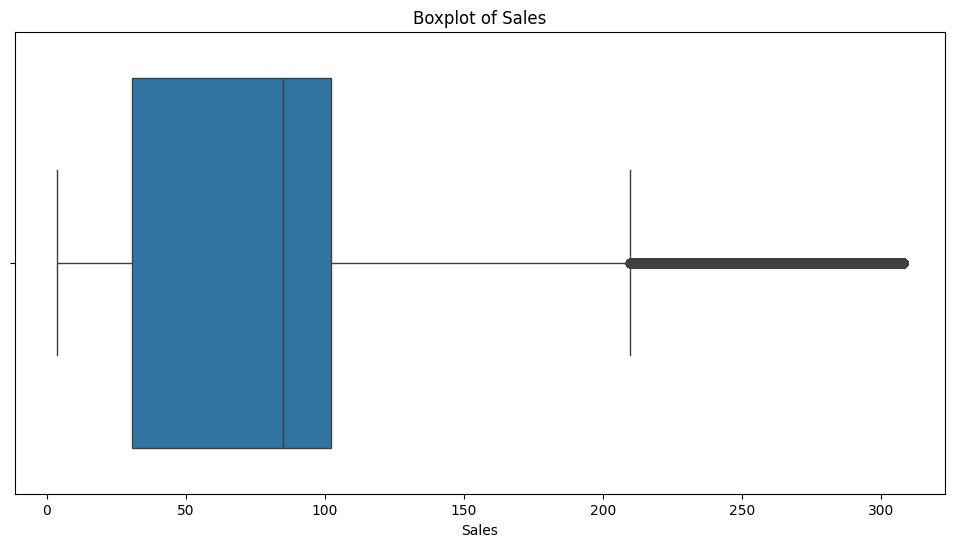

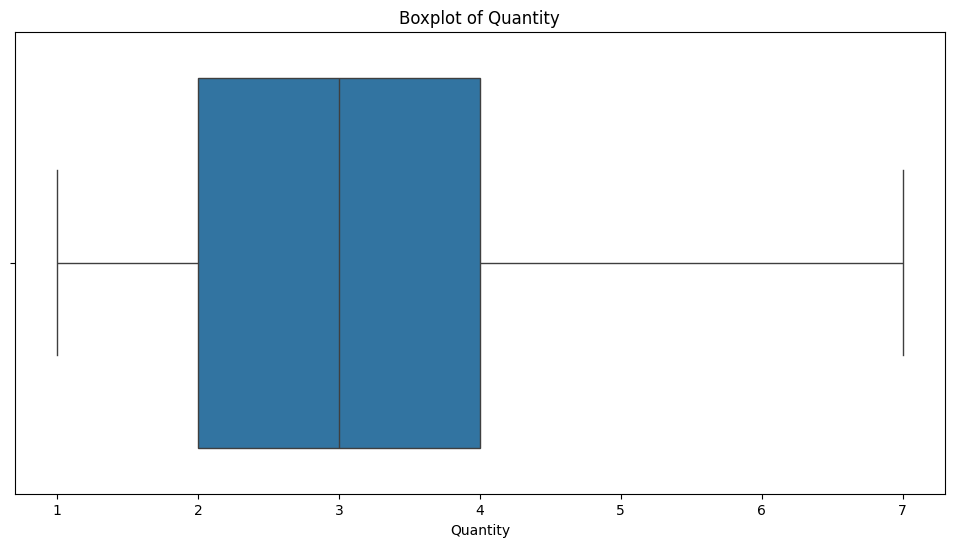

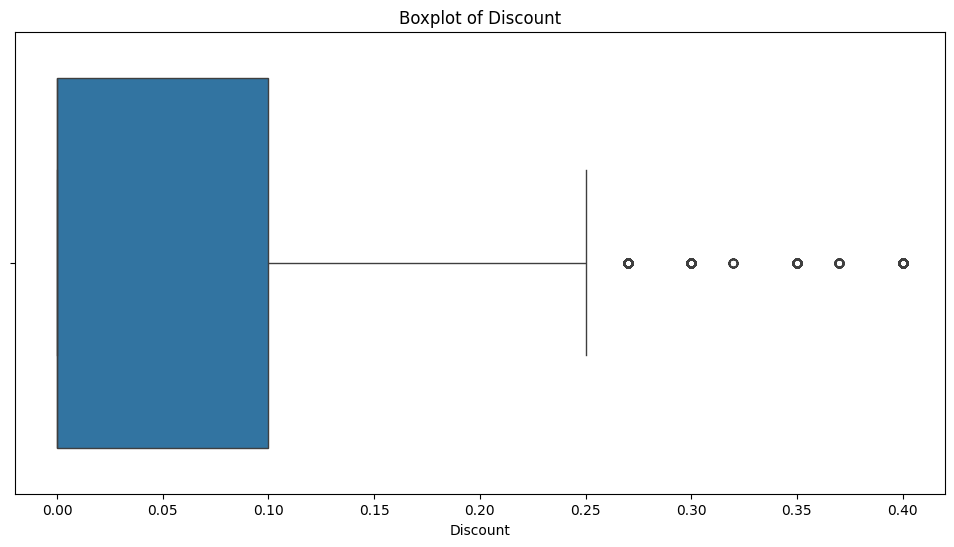

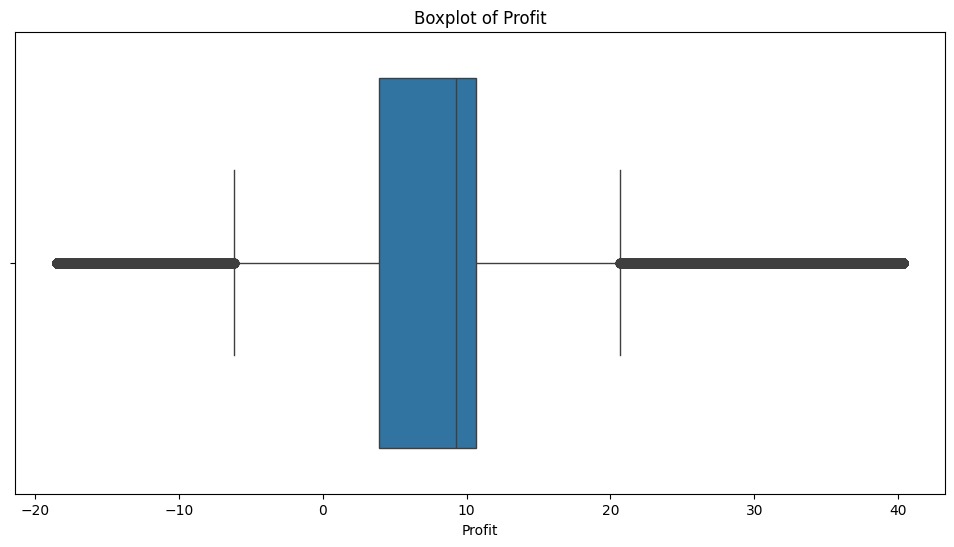

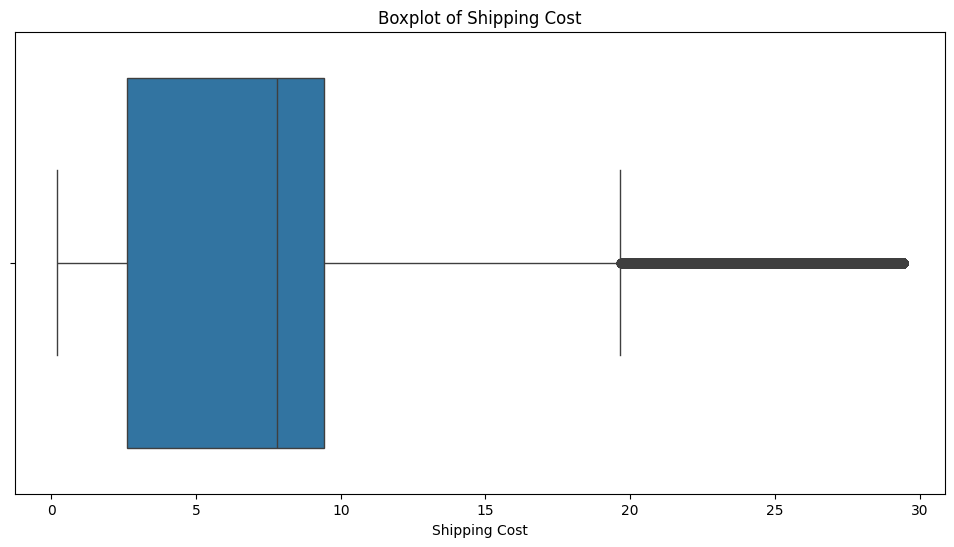

In [198]:

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [199]:
# Detect outliers in the Discount column
outliers_discount = detect_outliers_iqr(df, 'Discount')
print(f'Number of outliers in Discount: {len(outliers_discount)}')

Number of outliers in Discount: 4232


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


HERE ROWS OF DATA ARE PRESERVED ,IF WE TRY TO REMOVE ALL OUTLIERS SOME IMPORTANT DATAS (RECORDS)MAY BE LOST.

In [200]:
# Combine indices of outliers
outlier_indices = outliers_discount.index

# Remove outliers from the DataFrame
df_cleaned = df.drop(index=outlier_indices)

# Verify the number of rows before and after removal
print(f'Original number of rows: {len(df)}')
print(f'Number of rows after removing outliers: {len(df_cleaned)}')


Original number of rows: 51290
Number of rows after removing outliers: 47058


# **Summary Statistics**
before and after handling outliers:

In [202]:
# Before handling outliers
print(df[numerical_columns].describe())

# After handling outliers
print(df_cleaned[numerical_columns].describe())


              Sales      Quantity      Discount        Profit  Shipping Cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean      86.045799      3.079450      0.063942      9.142979       7.928220
std       71.147048      1.649379      0.116053     10.745720       6.844695
min        3.690000      1.000000      0.000000    -18.480000       0.200000
25%       30.758625      2.000000      0.000000      3.903400       2.610000
50%       85.050750      3.000000      0.000000      9.240000       7.790000
75%      102.360000      4.000000      0.100000     10.620000       9.430000
max      307.877280      7.000000      0.400000     40.320000      29.411100
              Sales      Quantity      Discount        Profit  Shipping Cost
count  47058.000000  47058.000000  47058.000000  47058.000000   47058.000000
mean      85.495332      3.062434      0.035737      9.723130       7.888603
std       70.927231      1.652625      0.069714     10.614931       6.828603

# **CORRELATION MATRIX AND VISUALIZE CORRELATION MATRIX**

                  Sales  Quantity  Discount    Profit  Shipping Cost
Sales          1.000000  0.207798  0.040368  0.293055       0.612242
Quantity       0.207798  1.000000  0.072180  0.124726       0.186302
Discount       0.040368  0.072180  1.000000 -0.178327       0.033739
Profit         0.293055  0.124726 -0.178327  1.000000       0.266530
Shipping Cost  0.612242  0.186302  0.033739  0.266530       1.000000


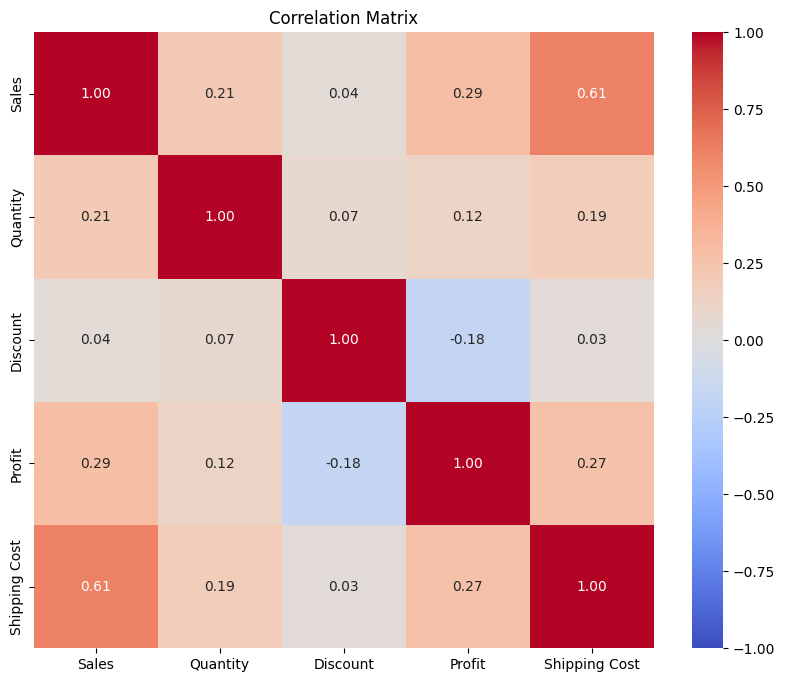

In [203]:
# List of numerical columns
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

# Filter the DataFrame to include only numerical columns
df_numerical = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# **HYPOTHESIS FROM CORRELATION MATRIX:**

**1.  Sales and Profit (0.29):**

Strength: Moderate positive correlation.

Implication: There is a moderate relationship between sales and profit, indicating that higher sales are associated with higher profits. This is generally expected, but the relationship is not extremely strong.

**2. Sales and Shipping Cost (0.61):**

Strength: Strong positive correlation.

Implication: Increased sales are associated with higher shipping costs. This suggests that as sales grow, the costs related to shipping increase, possibly due to higher volumes or more complex delivery requirements.

**3. Quantity and Profit (0.12):**

Strength: Weak positive correlation.

Implication: There is a weak relationship between the quantity of items sold and profit. This indicates that while selling more items is associated with increased profit, the effect is not very strong compared to other factors.

**4. Discount and Profit (-0.18):**

Strength: weak negative correlation.

Implication: There is a weak negative relationship between discount and profit, suggesting that higher discounts may slightly reduce profit margins. This is consistent with the idea that offering discounts can cut into profits, but the effect appears to be relatively minor. Further analysis could explore whether certain discount levels are more effective than others.

**5. Shipping Cost and Profit (0.27):**

Strength: Moderate positive correlation.

Implication: Higher shipping costs are moderately associated with higher profits. This could mean that higher shipping costs are tied to larger or more expensive orders, which in turn contribute to higher profits. However, the relationship is not as strong as with sales.

SOME VISUALIZATIONS FOR INTERPRETATION:



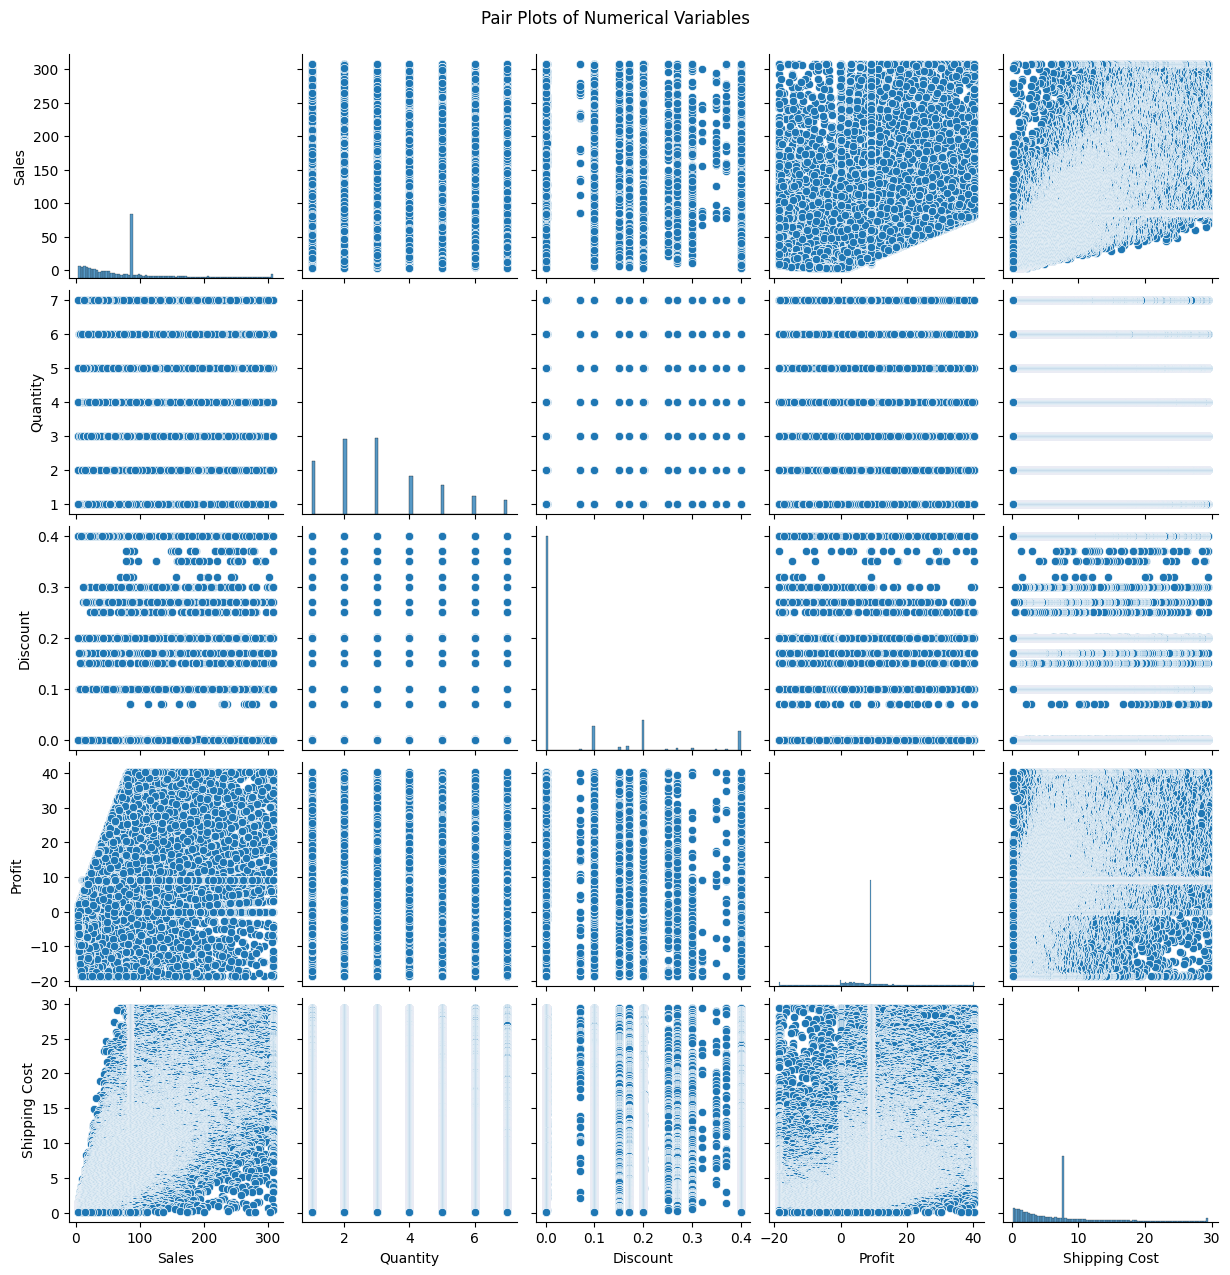

In [204]:
# Create pair plot for numerical columns
sns.pairplot(df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']])
plt.suptitle('Pair Plots of Numerical Variables', y=1.02)
plt.show()

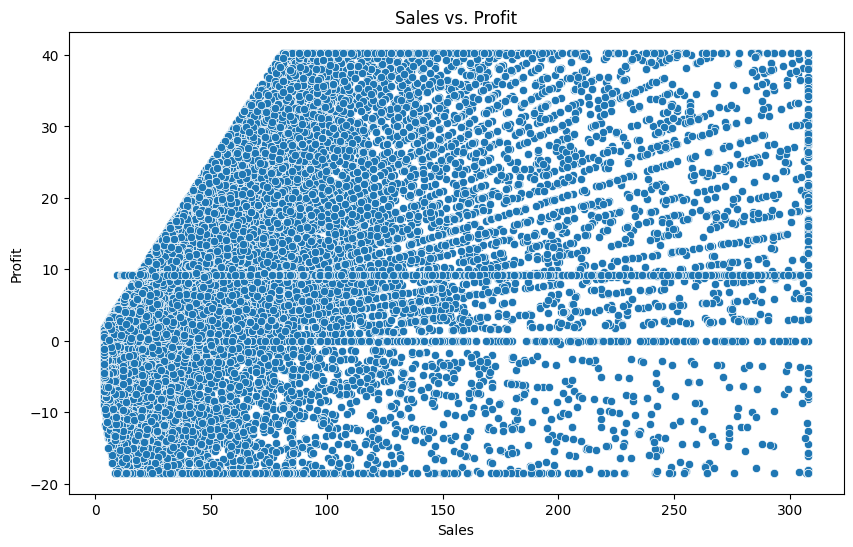

In [205]:
# Scatter plot between Sales and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

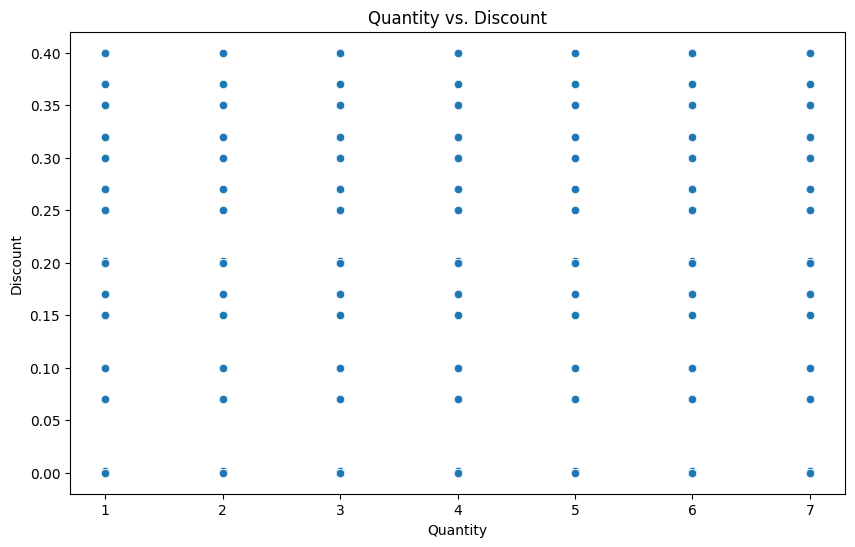

In [206]:
# Scatter plot between Quantity and Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Discount', data=df)
plt.title('Quantity vs. Discount')
plt.xlabel('Quantity')
plt.ylabel('Discount')
plt.show()

# **FURTHER INVESTIGATION:**

1.   weaker correlations or unexpected patterns (Discount and Profit) to understand the underlying reasons.
2.   Examine the distributions of Discount and Profit separately
3. Investigate if the relationship differs across different segments, such as Segment, Category or Region.
4. Calculate the summary statistics of Discount and Profit for different segments to understand if there are significant differences
5. Check for outliers in both Discount and Profit that might be affecting the correlation

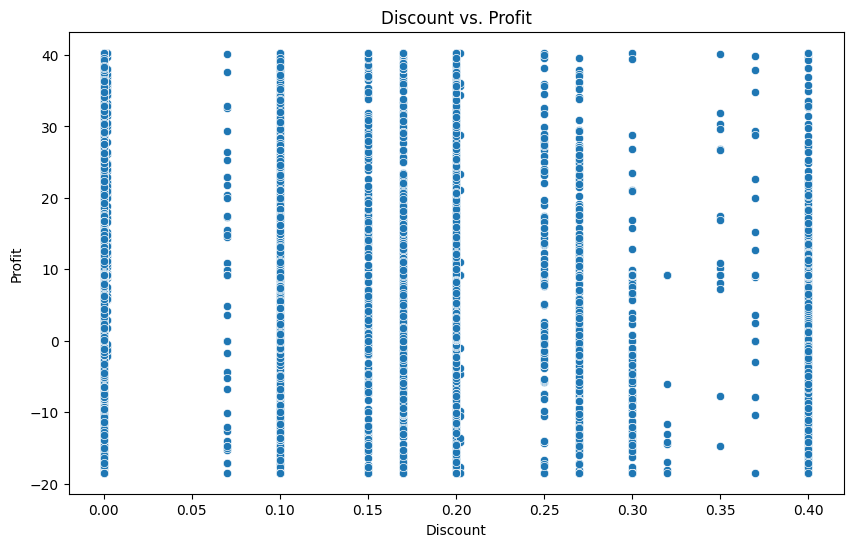

In [207]:
# Scatter plot between Discount and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

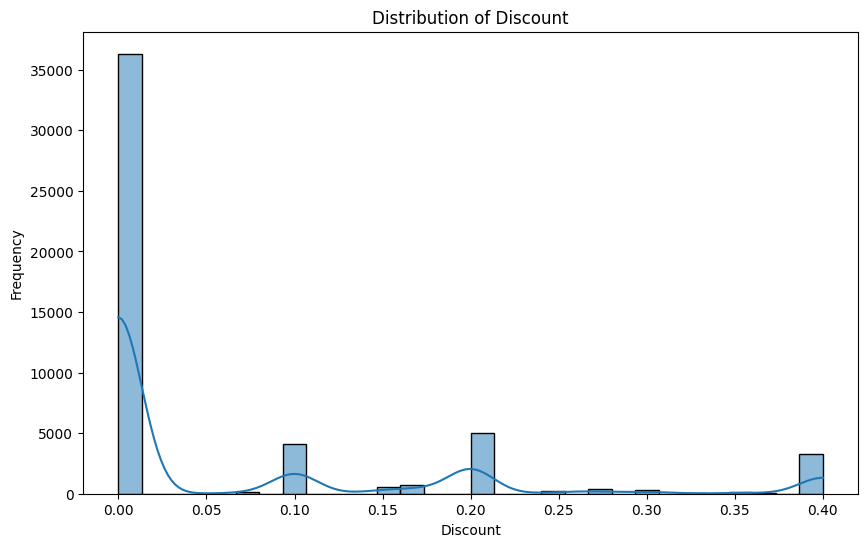

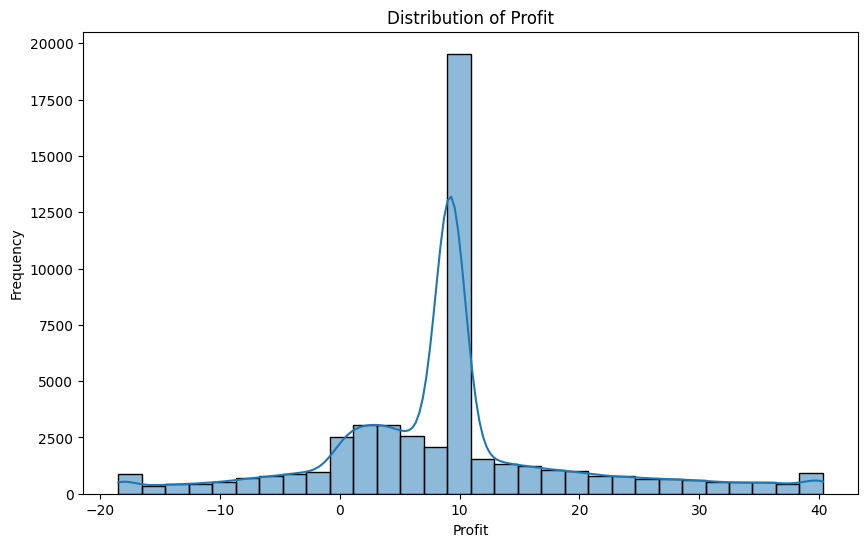

In [208]:
# Distribution of Discount
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], bins=30, kde=True)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

# Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


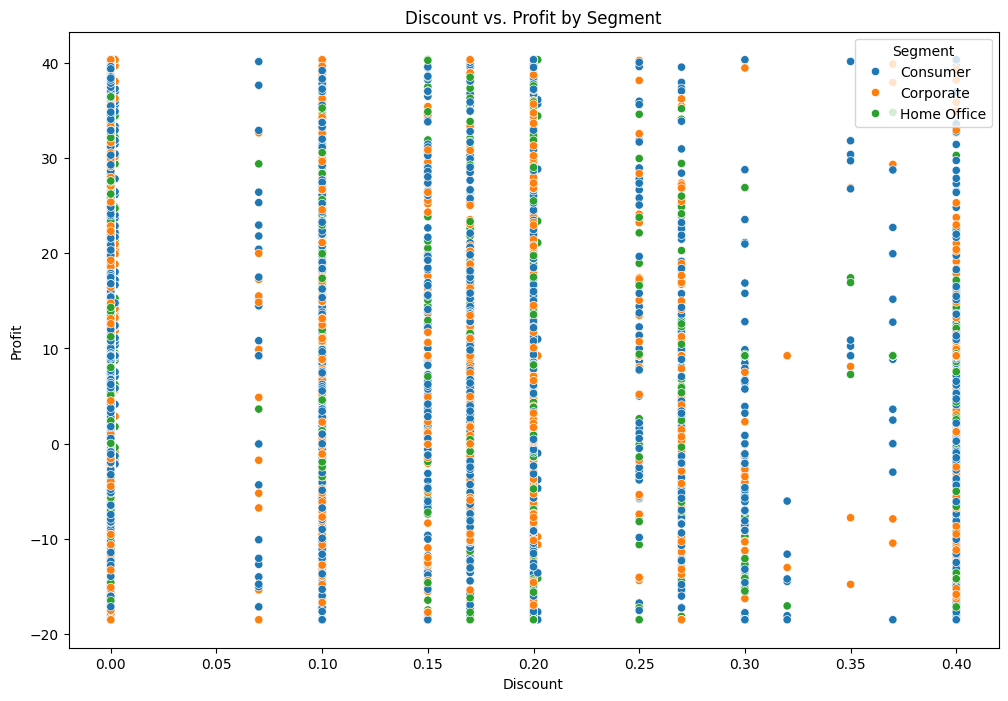

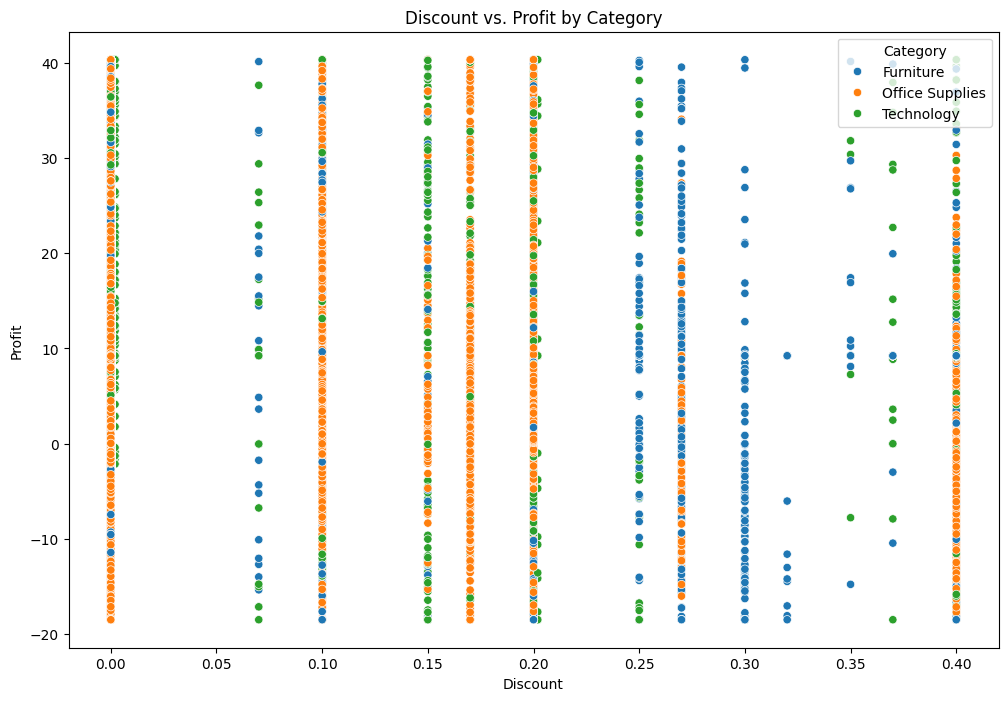

In [209]:
# Scatter plot of Discount vs. Profit by Segment
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Discount', y='Profit', hue='Segment', data=df)
plt.title('Discount vs. Profit by Segment')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Scatter plot of Discount vs. Profit by Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df)
plt.title('Discount vs. Profit by Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [211]:
# Summary statistics by Segment
print(df.groupby('Segment')[['Discount', 'Profit']].describe())

# Summary statistics by Category
print(df.groupby('Category')[['Discount', 'Profit']].describe())

            Discount                                                Profit  \
               count      mean       std  min  25%  50%  75%  max    count   
Segment                                                                      
Consumer     26518.0  0.064442  0.116265  0.0  0.0  0.0  0.1  0.4  26518.0   
Corporate    15429.0  0.064058  0.116135  0.0  0.0  0.0  0.1  0.4  15429.0   
Home Office   9343.0  0.062332  0.115315  0.0  0.0  0.0  0.1  0.4   9343.0   

                                                                        
                 mean        std    min      25%   50%      75%    max  
Segment                                                                 
Consumer     9.185462  10.763730 -18.48  3.92235  9.24  10.6200  40.32  
Corporate    9.127904  10.751240 -18.48  3.92400  9.24  10.6794  40.32  
Home Office  9.047298  10.685736 -18.48  3.82760  9.24  10.5132  40.32  
                Discount                                               \
                   c

**from these we can summarize the finding of how discount impact profit and also we can divide that into By segment and By category.**

**By Segment:**

*   **Discount:**

**Findings:** The mean discount across segments (Consumer, Corporate, Home Office) is quite similar, ranging between 0.062 and 0.064. Most discounts are low, with a maximum of 0.4. The concentration of discounts in the lower range suggests a consistent discounting approach across segments..

**Implication:** The uniformity of discounts across segments implies a standardized discount strategy. However, the impact of discounts on profit may vary by segment due to differences in customer behavior or purchasing patterns.

* **Profit:**

**Findings:** The mean profit values across segments are close, ranging from 9.047 to 9.185. The profit ranges and distributions are consistent, with maximum profits at 40.32.

**Implication:** The similar profit levels across segments suggest that the discount strategy may have a uniform impact on profit, regardless of the customer segment. It indicates that other factors, such as product mix or customer loyalty, might influence profitability.

**By Category:**

*  **Discount:**

**Furniture:**

Findings: Highest mean discount (0.100) and higher variability. This suggests that furniture items often receive more substantial discounts.

Implication: Higher discounts in the furniture category could be a strategy to boost sales, potentially at the expense of profit margins.

**Office supply:**

Findings: Lowest mean discount (0.050) and less variability. Discounts are more consistent but lower on average.

Implication: The lower and more consistent discounts in Office Supplies could indicate a strategy focused on volume sales with smaller margins

**Technology:**

Findings: Mean discount (0.070) is between Furniture and Office Supplies, with moderate variability.

Implication: Technology discounts are likely designed to balance competitiveness with profitability, possibly to drive sales while maintaining margin.
*   **Profit:**

**Furniture:**

Findings:Highest mean profit (9.859) with moderate variability. This suggests a higher profit potential, though with some fluctuations.

Implication: The high mean profit in the furniture category may be due to the higher value of furniture items, even with higher discounts.

  **Office Supplies:**

Findings: Lowest mean profit (8.292), but the maximum profit is consistent with other categories.

Implication: Despite lower average profits, the potential for high profits still exists in Office Supplies, possibly due to bulk sales or high-margin items within the category.

  **Technology:**
  
Findings: Highest mean profit (11.067) with moderate variability, indicating that technology items tend to be more profitable.

Implication: The higher profits in the technology category could be attributed to higher-margin products or premium pricing strategies, and this aligns with the slightly higher discount level to stimulate sales.









# **`making visualization easily readable and interprettable`**

1.   sampling data
2.   zooming specific relationship
3.   aggregated data
4.  adjusting plot style
5.  faceting




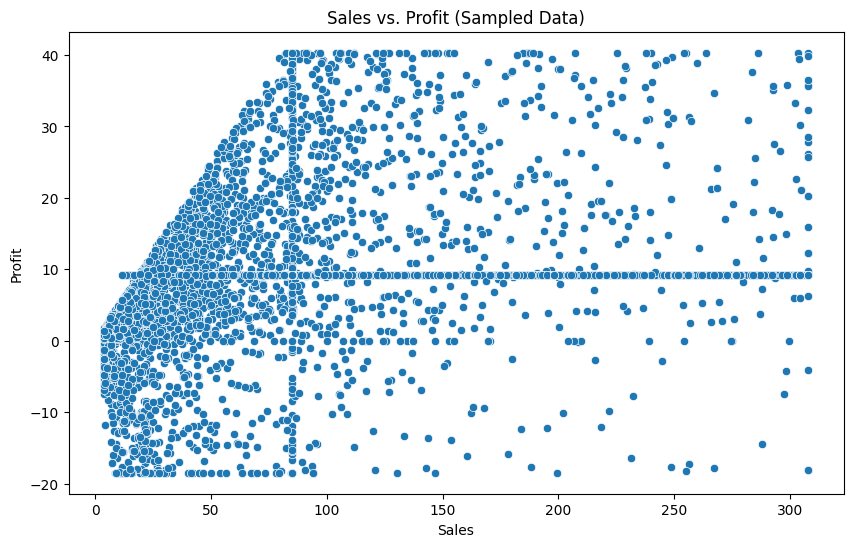

In [212]:
# Sample 10% of the data for visualization
df_sample = df.sample(frac=0.1, random_state=1)
# Scatter plot between Sales and Profit for a sample of data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_sample)
plt.title('Sales vs. Profit (Sampled Data)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

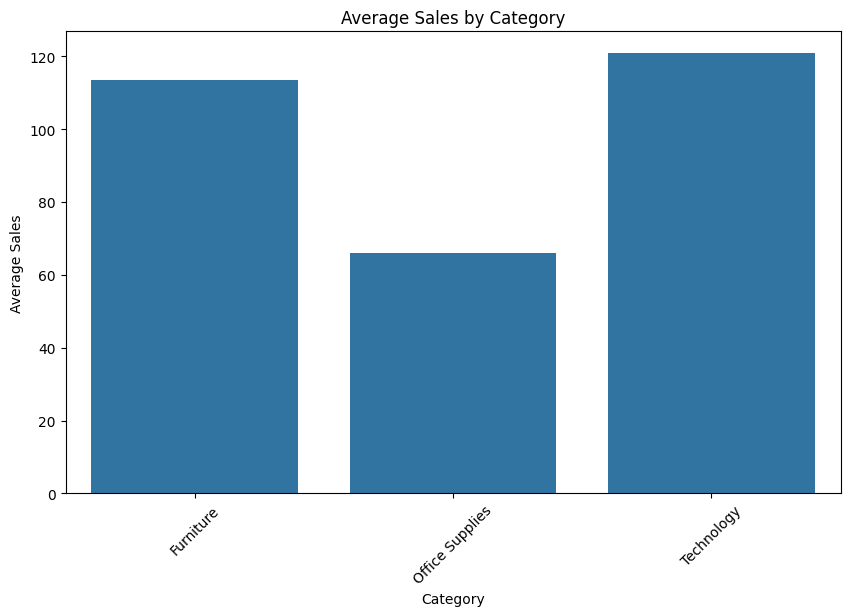

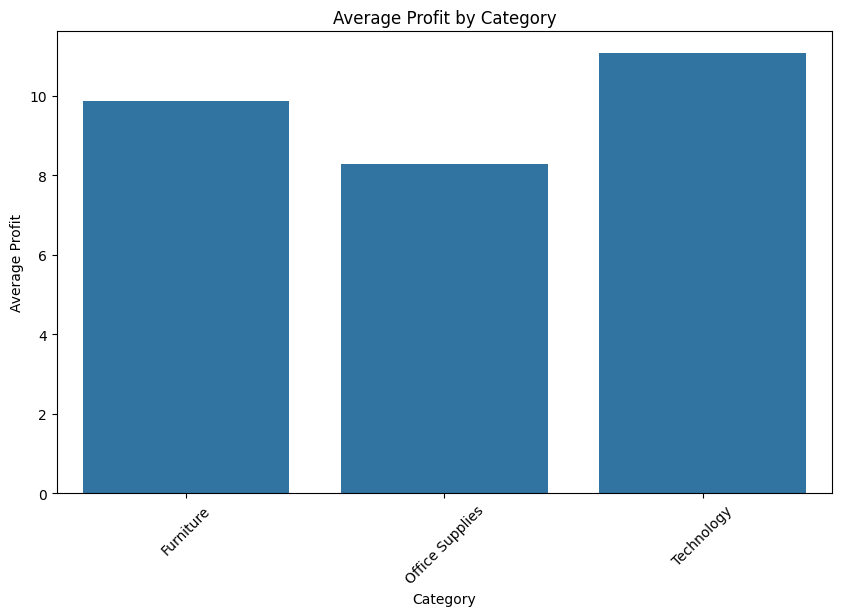

In [213]:
# Aggregate by category to get average Sales and Profit
df_agg = df.groupby('Category').agg({
    'Sales': 'mean',
    'Profit': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df_agg)
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df_agg)
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

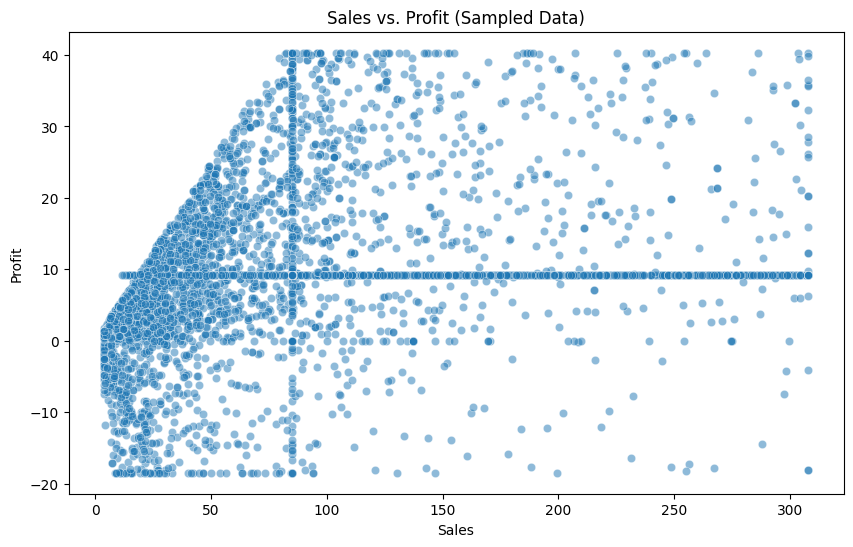

In [214]:
#adjust style_with adding transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_sample, alpha=0.5)
plt.title('Sales vs. Profit (Sampled Data)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

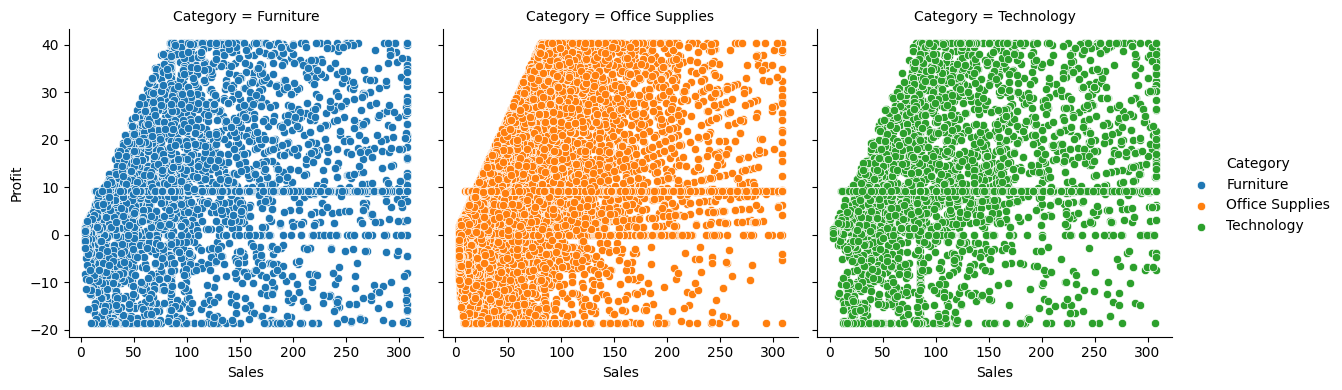

In [215]:
#faceting
# Facet grid for different categories
g = sns.FacetGrid(df, col='Category', hue='Category', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Sales', 'Profit')
g.add_legend()
plt.show()

# **export the processed data into excel file and we can use data to make classifier models**

In [216]:
!pip install openpyxl


In [217]:

# Replace df with your processed DataFrame
df.to_excel('/content/Global_superstore_processed_data.xlsx', index=False, engine='openpyxl')
from google.colab import files

# Download the file
files.download('/content/Global_superstore_processed_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  Exploratory Data Analysis


In [218]:
# Check for missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [219]:
print(df.describe())


            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date         Sales      Quantity  \
count                          51290  51290.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528     86.045799      3.079450   
min              2011-01-03 00:00:00      3.690000      1.000000   
25%              2012-06-23 00:00:00     30.758625      2.000000   
50%              2013-07-12 00:00:00     85.050750      3.000000   
75%              2014-05-26 00:00:00    102.360000      4.000000   
max              2015-01-07 00:00:00    307.87

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

# Univariate Analysis :

*   Univariate Analysis for Numerical Variables(Histograms and Boxplots)
*   Univariate Analysis for Categorical Variables(Bar Plots)



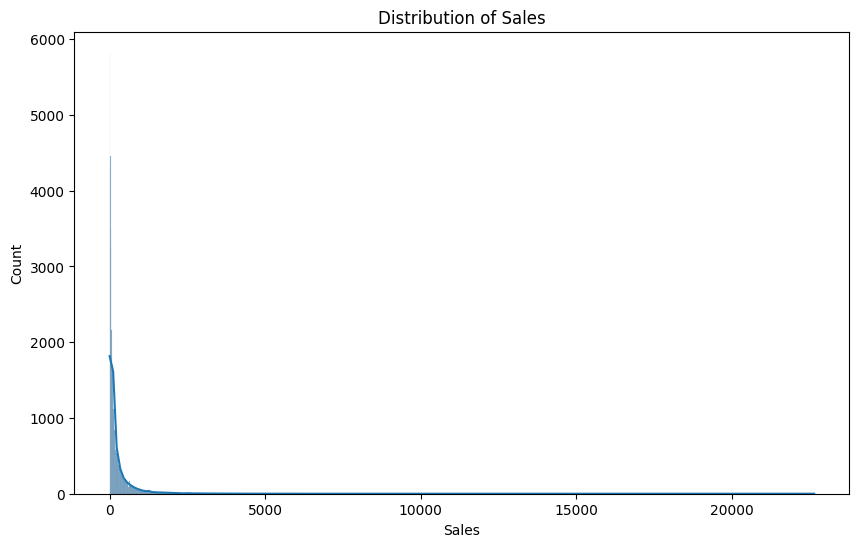

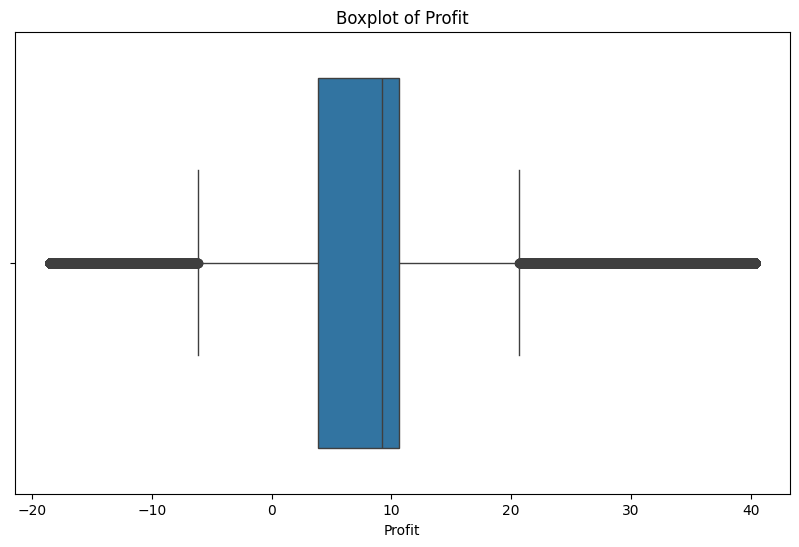

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_for_eda['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Boxplot for Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Boxplot of Profit')
plt.show()



Value counts for Ship Mode:
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

Value counts for Segment:
Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

Value counts for City:
City
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Vesoul              1
V‡rzea Grande       1
Luanshya            1
Kissimmee           1
Victoria Falls      1
Name: count, Length: 3636, dtype: int64

Value counts for State:
State
California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Lambayeque               1
Aveiro                   1
Lima                     1
Medea                    1
Matabeleland North       1
Name: count, Length: 1094, dtype: int64

Value counts for Country:
Country
U

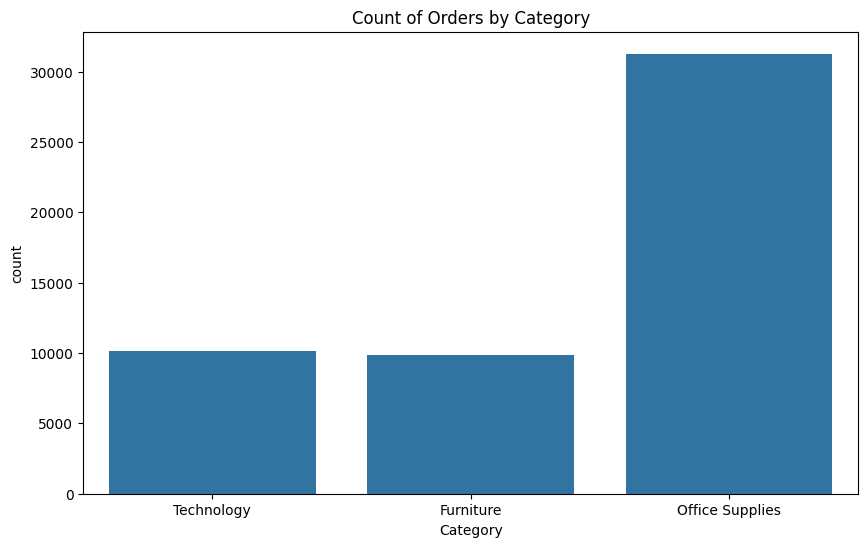

In [222]:
categorical_columns = [
    'Ship Mode', 'Segment', 'City', 'State', 'Country',
    'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority'
]

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df_for_eda[col].value_counts())
# Bar plot for Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df_for_eda)
plt.title('Count of Orders by Category')
plt.show()


# **Bivariate Analysis**

1.  Bivariate Analysis for Numerical Variables(Scatter Plot:)
2.  Bivariate Analysis for Categorical and Numerical Variables(Box Plot and Bar plot)



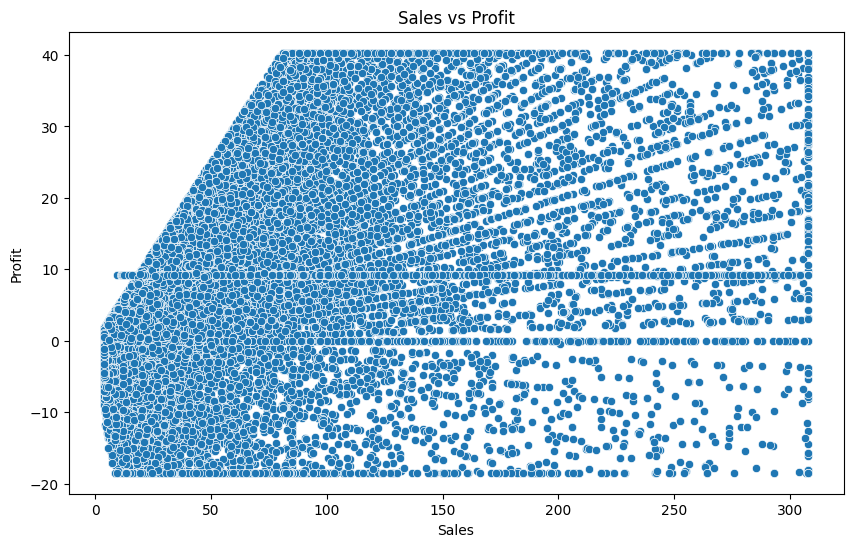

In [225]:
# Scatter plot between Sales and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs Profit')
plt.show()


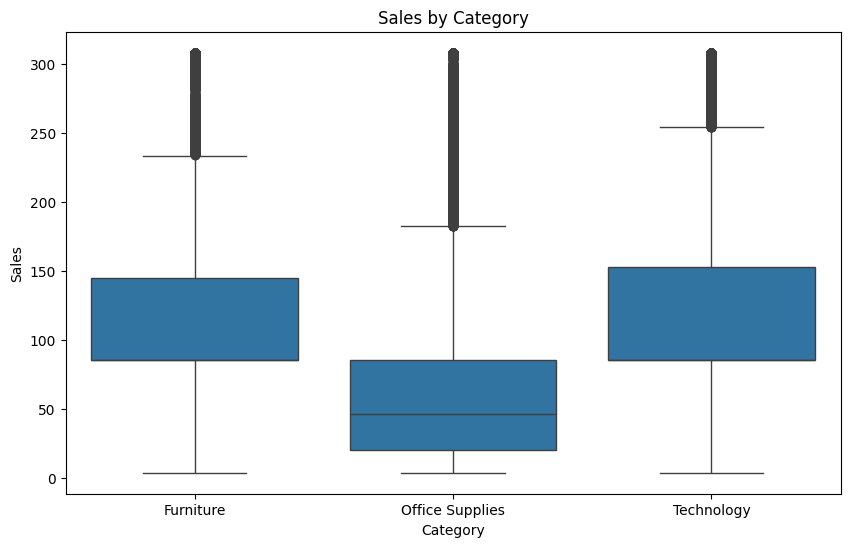

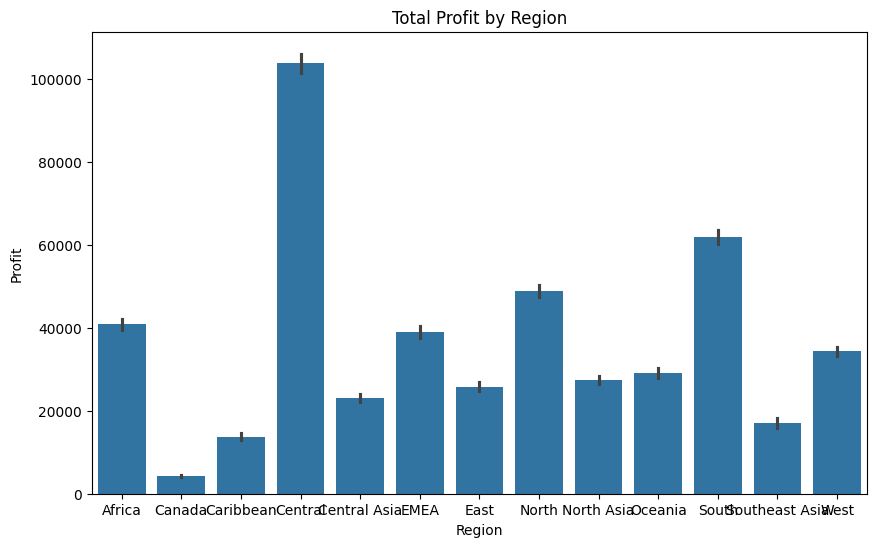

In [228]:
# Box plot for Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()
# Bar plot for average Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Region')
plt.show()


# **Multivariate Analysis**

1.   Pair Plot
2.   Heatmap with Categorical





<Figure size 1200x1000 with 0 Axes>

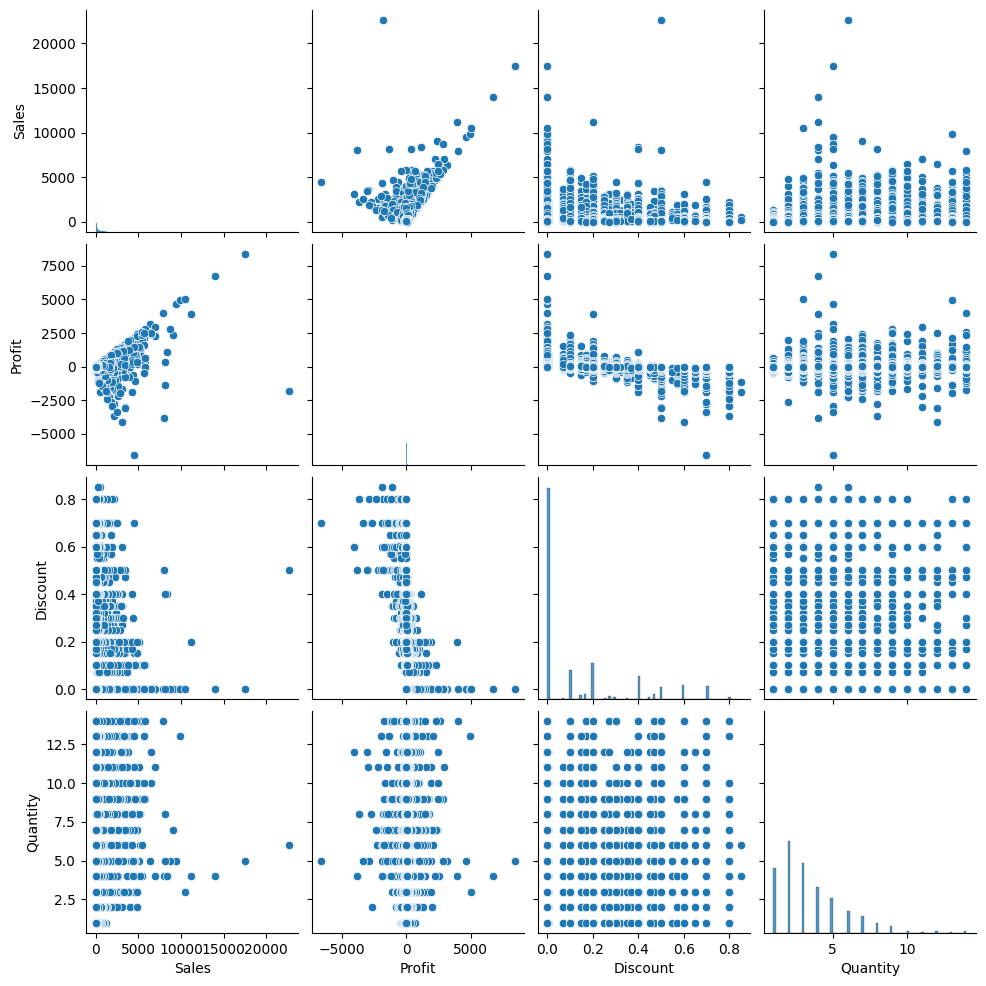

In [229]:
# Pair plot for selected numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df_for_eda[['Sales', 'Profit', 'Discount', 'Quantity']])
plt.show()


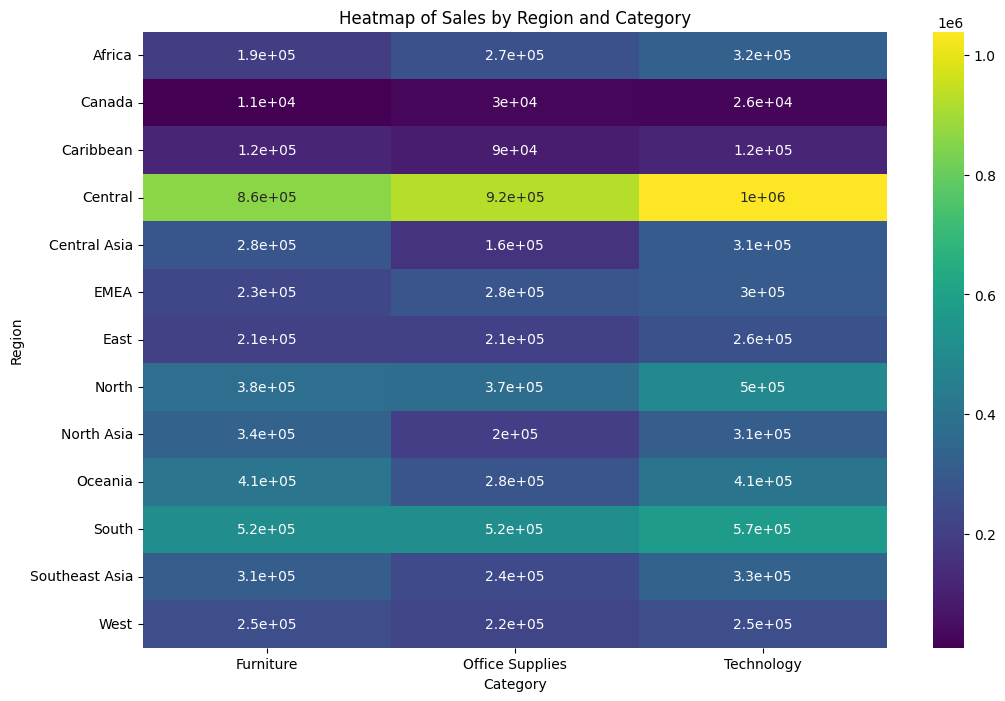

In [230]:
# Pivot table and heatmap for Sales by Region and Category
pivot_table = df_for_eda.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap of Sales by Region and Category')
plt.show()


EDA COMPLETED FOR ETL LETS SAVE THE TRASFORMED FILE AND LOAD INTO POWERBI

In [231]:
# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_Global-Superstore_dataset.csv'  # Change this to your desired file path
df_for_eda.to_csv(cleaned_file_path, index=False)